## Main Plots

- trained on rotated projectioms
- group by halo id and snapshot number

Saved: figures/model_performance_tau_scan_main_rotation.pdf and figures/model_performance_tau_scan_main_rotation.png


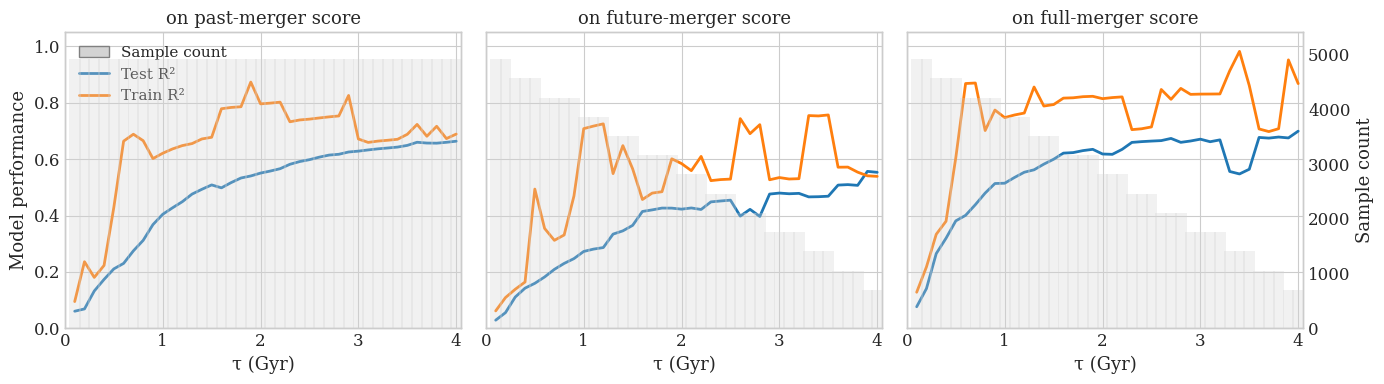

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
# Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})



def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")

# Load data
base_path = "./plot_data/phase-space/"
files = {
    "past-merger score": base_path + "tau_scan_rotation_main_pre.csv",
    "future-merger score": base_path + "tau_scan_rotation_main_post.csv",
    "full-merger score": base_path + "tau_scan_rotation_main_all.csv"
}
dfs = {label: pd.read_csv(path) for label, path in files.items()}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.25)

# Set unified ylim for all sample bars
all_n_samples = pd.concat([df["n_samples"] for df in dfs.values()])
sample_ylim = (0, all_n_samples.max() * 1.1)

# R² line colors
colors = {"Test R²": "#1f77b4", "Train R²": "#ff7f0e"}

# Plot each panel
for i, (ax, (title, df)) in enumerate(zip(axes, dfs.items())):
    τ = df["tau"]
    r2_test = df["R2_test"]
    r2_train = df["R2_train"]
    n_samples = df["n_samples"]

    # Plot R² curves on left axis
    ax.plot(τ, r2_test, label="Test R²" if i == 0 else None,
            color=colors["Test R²"], lw=2, zorder=3)
    ax.plot(τ, r2_train, label="Train R²" if i == 0 else None,
            color=colors["Train R²"], lw=2, zorder=4)

    # Plot sample count bar on a separate right axis
    ax_bar = ax.twinx()
    ax_bar.set_ylim(sample_ylim)
    ax_bar.bar(τ, n_samples, width=0.12, alpha=0.3, color="lightgray", zorder=1)
    ax_bar.grid(False)
    ax_bar.set_facecolor("none")


    # Only last subplot shows ticks and label
    if i < 2:
        ax_bar.set_yticks([])
        ax_bar.set_ylabel("")
        ax_bar.tick_params(right=False)
    else:
        ax_bar.set_ylabel("Sample count")

    # Formatting
    ax.set_title(f"on {title}")
    ax.set_xlim(0, 4.05)
    ax.set_ylim(0, 1.05)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xlabel("τ (Gyr)")
    if i == 0:
        ax.set_ylabel("Model performance")

# Custom legend
custom_legend = [
    Patch(facecolor="lightgray", edgecolor="gray", label="Sample count"),
    plt.Line2D([], [], color=colors["Test R²"], lw=2, label="Test R²"),
    plt.Line2D([], [], color=colors["Train R²"], lw=2, label="Train R²")
]
axes[0].legend(handles=custom_legend, loc="upper left")

# Save and show
plt.tight_layout()
save_figure(plt.gcf(), "model_performance_tau_scan_main_rotation")
plt.show()


## Main Plots - Shuffle

- trained on rotated projections with different ordering 
- grouped by halo id and snapshot number

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})



def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")


# Load data
base_path = "plot_data/phase-space/"
files = {
    "past-merger score": base_path + "tau_scan_rotation_shuffle_main_pre.csv",
    "future-merger score": base_path + "tau_scan_rotation_shuffle_main_post.csv",
    "full-merger score": base_path + "tau_scan_rotation_shuffle_main_all.csv"
}
dfs = {label: pd.read_csv(path) for label, path in files.items()}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.25)

# Set unified ylim for all sample bars
all_n_samples = pd.concat([df["n_samples"] for df in dfs.values()])
sample_ylim = (0, all_n_samples.max() * 1.1)

# R² line colors
colors = {"Test R²": "#1f77b4", "Train R²": "#ff7f0e"}

# Plot each panel
for i, (ax, (title, df)) in enumerate(zip(axes, dfs.items())):
    τ = df["tau"]
    r2_test = df["R2_test"]
    r2_train = df["R2_train"]
    n_samples = df["n_samples"]

    # Plot R² curves on left axis
    ax.plot(τ, r2_test, label="Test R²" if i == 0 else None,
            color=colors["Test R²"], lw=2, zorder=3)
    ax.plot(τ, r2_train, label="Train R²" if i == 0 else None,
            color=colors["Train R²"], lw=2, zorder=4)

    # Plot sample count bar on a separate right axis
    ax_bar = ax.twinx()
    ax_bar.set_ylim(sample_ylim)
    ax_bar.bar(τ, n_samples, width=0.12, alpha=0.3, color="lightgray", zorder=1)
    ax_bar.grid(False)
    ax_bar.set_facecolor("none")


    # Only last subplot shows ticks and label
    if i < 2:
        ax_bar.set_yticks([])
        ax_bar.set_ylabel("")
        ax_bar.tick_params(right=False)
    else:
        ax_bar.set_ylabel("Sample count")

    # Formatting
    ax.set_title(f"on {title}")
    ax.set_xlim(0, 4.05)
    ax.set_ylim(0, 1.05)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xlabel("τ (Gyr)")
    if i == 0:
        ax.set_ylabel("Model performance")
# Custom legend
custom_legend = [
    Patch(facecolor="lightgray", edgecolor="gray", label="Sample count"),
    plt.Line2D([], [], color=colors["Test R²"], lw=2, label="Test R²"),
    plt.Line2D([], [], color=colors["Train R²"], lw=2, label="Train R²")
]
axes[0].legend(handles=custom_legend, loc="upper left")

# Save and show
plt.tight_layout()
save_figure(plt.gcf(), "model_performance_tau_scan_main_shuffle")
plt.show()

## Baseline Plots 

- trained on rotated projections
- grouped by halo id

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})



def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")

# Load data
base_path = "plot_data/phase-space/"
files = {
    "past-merger score": base_path + "tau_scan_rotation_baseline_pre.csv",
    "future-merger score": base_path + "tau_scan_rotation_baseline_post.csv",
    "full-merger score": base_path + "tau_scan_rotation_baseline_all.csv"
}
dfs = {label: pd.read_csv(path) for label, path in files.items()}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.25)

# Set unified ylim for all sample bars
all_n_samples = pd.concat([df["n_samples"] for df in dfs.values()])
sample_ylim = (0, all_n_samples.max() * 1.1)

# R² line colors
colors = {"Test R²": "#1f77b4", "Train R²": "#ff7f0e"}

# Plot each panel
for i, (ax, (title, df)) in enumerate(zip(axes, dfs.items())):
    τ = df["tau"]
    r2_test = df["R2_test"]
    r2_train = df["R2_train"]
    n_samples = df["n_samples"]

    # Plot R² curves on left axis
    ax.plot(τ, r2_test, label="Test R²" if i == 0 else None,
            color=colors["Test R²"], lw=2, zorder=3)
    ax.plot(τ, r2_train, label="Train R²" if i == 0 else None,
            color=colors["Train R²"], lw=2, zorder=4)

    # Plot sample count bar on a separate right axis
    ax_bar = ax.twinx()
    ax_bar.set_ylim(sample_ylim)
    ax_bar.bar(τ, n_samples, width=0.12, alpha=0.3, color="lightgray", zorder=1)
    ax_bar.grid(False)
    ax_bar.set_facecolor("none")


    # Only last subplot shows ticks and label
    if i < 2:
        ax_bar.set_yticks([])
        ax_bar.set_ylabel("")
        ax_bar.tick_params(right=False)
    else:
        ax_bar.set_ylabel("Sample count")

    # Formatting
    ax.set_title(f"on {title}")
    ax.set_xlim(0, 4.05)
    ax.set_ylim(0, 1.05)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xlabel("τ (Gyr)")
    if i == 0:
        ax.set_ylabel("Model performance")
# Custom legend
custom_legend = [
    Patch(facecolor="lightgray", edgecolor="gray", label="Sample count"),
    plt.Line2D([], [], color=colors["Test R²"], lw=2, label="Test R²"),
    plt.Line2D([], [], color=colors["Train R²"], lw=2, label="Train R²")
]
axes[0].legend(handles=custom_legend, loc="upper left")

# Save and show
plt.tight_layout()
save_figure(plt.gcf(), "model_performance_tau_scan_baseline_rotation")
plt.show()

## Baseline Plots 

- trained on all projections (i.e. x, y, z)
- grouped by halo id

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})



def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")

# Load data
base_path = "plot_data/phase-space/"
files = {
    "past-merger score": base_path + "tau_scan_fullproj_baseline_pre.csv",
    "future-merger score": base_path + "tau_scan_fullproj_baseline_post.csv",
    "full-merger score": base_path + "tau_scan_fullproj_baseline_all.csv"
}
dfs = {label: pd.read_csv(path) for label, path in files.items()}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.25)

# Set unified ylim for all sample bars
all_n_samples = pd.concat([df["n_samples"] for df in dfs.values()])
sample_ylim = (0, all_n_samples.max() * 1.1)

# R² line colors
colors = {"Test R²": "#1f77b4", "Train R²": "#ff7f0e"}

# Plot each panel
for i, (ax, (title, df)) in enumerate(zip(axes, dfs.items())):
    τ = df["tau"]
    r2_test = df["R2_test"]
    r2_train = df["R2_train"]
    n_samples = df["n_samples"]

    # Plot R² curves on left axis
    ax.plot(τ, r2_test, label="Test R²" if i == 0 else None,
            color=colors["Test R²"], lw=2, zorder=3)
    ax.plot(τ, r2_train, label="Train R²" if i == 0 else None,
            color=colors["Train R²"], lw=2, zorder=4)

    # Plot sample count bar on a separate right axis
    ax_bar = ax.twinx()
    ax_bar.set_ylim(sample_ylim)
    ax_bar.bar(τ, n_samples, width=0.12, alpha=0.3, color="lightgray", zorder=1)
    ax_bar.grid(False)
    ax_bar.set_facecolor("none")


    # Only last subplot shows ticks and label
    if i < 2:
        ax_bar.set_yticks([])
        ax_bar.set_ylabel("")
        ax_bar.tick_params(right=False)
    else:
        ax_bar.set_ylabel("Sample count")

    # Formatting
    ax.set_title(f"on {title}")
    ax.set_xlim(0, 4.05)
    ax.set_ylim(0, 1.05)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xlabel("τ (Gyr)")
    if i == 0:
        ax.set_ylabel("Model performance")
# Custom legend
custom_legend = [
    Patch(facecolor="lightgray", edgecolor="gray", label="Sample count"),
    plt.Line2D([], [], color=colors["Test R²"], lw=2, label="Test R²"),
    plt.Line2D([], [], color=colors["Train R²"], lw=2, label="Train R²")
]
axes[0].legend(handles=custom_legend, loc="upper left")

# Save and show
plt.tight_layout()
save_figure(plt.gcf(), "model_performance_tau_scan_baseline_fullproj")
plt.show()

## Discussion

- construction of richness-independent feature set

Saved: figures/model_performance_tau_scan_discussion.pdf and figures/model_performance_tau_scan_discussion.png


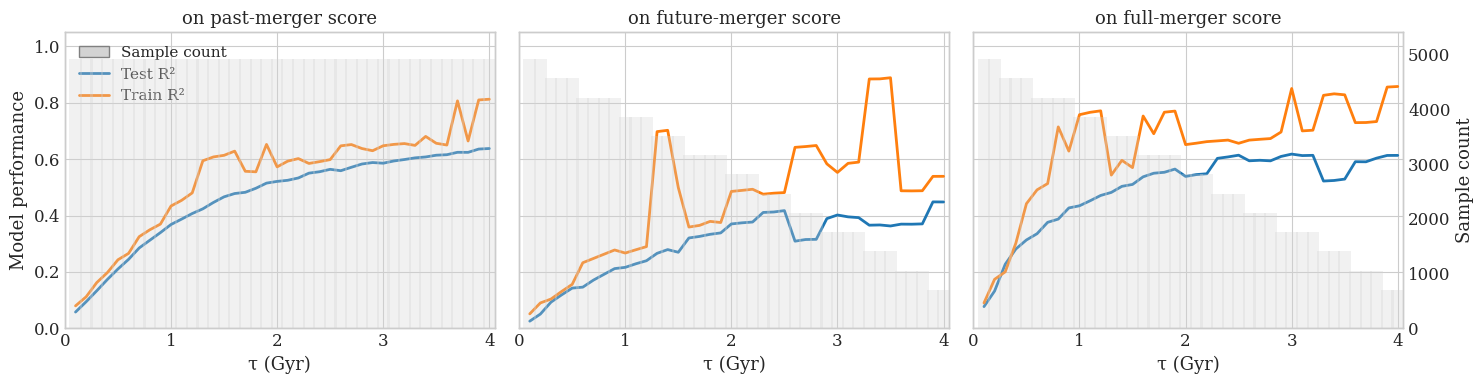

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})



def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")

# Load data
base_path = "plot_data/phase-space/"
files = {
    "past-merger score": base_path + "tau_scan_rotation_discussion_pre.csv",
    "future-merger score": base_path + "tau_scan_rotation_discussion_post.csv",
    "full-merger score": base_path + "tau_scan_rotation_discussion_all.csv"
}
dfs = {label: pd.read_csv(path) for label, path in files.items()}

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.25)

# Set unified ylim for all sample bars
all_n_samples = pd.concat([df["n_samples"] for df in dfs.values()])
sample_ylim = (0, all_n_samples.max() * 1.1)

# R² line colors
colors = {"Test R²": "#1f77b4", "Train R²": "#ff7f0e"}

# Plot each panel
for i, (ax, (title, df)) in enumerate(zip(axes, dfs.items())):
    τ = df["tau"]
    r2_test = df["R2_test"]
    r2_train = df["R2_train"]
    n_samples = df["n_samples"]

    # Plot R² curves on left axis
    ax.plot(τ, r2_test, label="Test R²" if i == 0 else None,
            color=colors["Test R²"], lw=2, zorder=3)
    ax.plot(τ, r2_train, label="Train R²" if i == 0 else None,
            color=colors["Train R²"], lw=2, zorder=4)

    # Plot sample count bar on a separate right axis
    ax_bar = ax.twinx()
    ax_bar.set_ylim(sample_ylim)
    ax_bar.bar(τ, n_samples, width=0.12, alpha=0.3, color="lightgray", zorder=1)
    ax_bar.grid(False)
    ax_bar.set_facecolor("none")


    # Only last subplot shows ticks and label
    if i < 2:
        ax_bar.set_yticks([])
        ax_bar.set_ylabel("")
        ax_bar.tick_params(right=False)
    else:
        ax_bar.set_ylabel("Sample count")

    # Formatting
    ax.set_title(f"on {title}")
    ax.set_xlim(0, 4.05)
    ax.set_ylim(0, 1.05)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xlabel("τ (Gyr)")
    if i == 0:
        ax.set_ylabel("Model performance")
# Custom legend
custom_legend = [
    Patch(facecolor="lightgray", edgecolor="gray", label="Sample count"),
    plt.Line2D([], [], color=colors["Test R²"], lw=2, label="Test R²"),
    plt.Line2D([], [], color=colors["Train R²"], lw=2, label="Train R²")
]
axes[0].legend(handles=custom_legend, loc="upper left")

# Save and show
plt.tight_layout()
save_figure(plt.gcf(), "model_performance_tau_scan_discussion")
plt.show()